# Analyse des Titres Netflix
Dans ce notebook, nous allons explorer un ensemble de données contenant des informations sur les titres disponibles sur Netflix. 
Les analyses suivantes seront effectuées:
1. Exploration initiale des données
2. Distribution des types de titres (Films/Séries TV)
3. Distribution des années de sortie
4. Les 10 pays les plus productifs
5. Catégories de contenu les plus courantes



## 1. Lecture et chargement du dataframe

In [2]:
import pandas as pd

file_path = 'netflix_titles.csv'
df = pd.read_csv(file_path)
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


## 2. Distribution des types de titres (Films/Séries TV)


In [7]:
import matplotlib.pyplot as plt
type_counts = df.type.value_counts()

### creation de la frame du graph

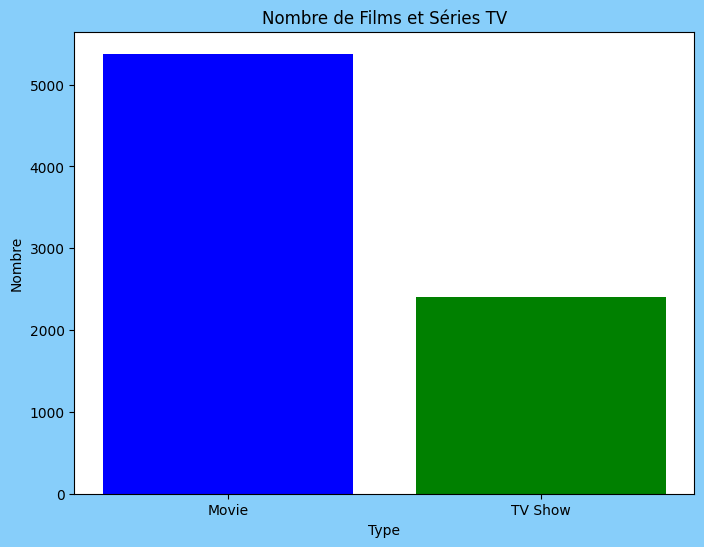

In [8]:
plt.figure(figsize=(8, 6),facecolor='lightskyblue')
plt.bar(type_counts.index, type_counts.values, color=['blue', 'green'])
plt.title('Nombre de Films et Séries TV') # titre
plt.xlabel('Type') # x 
plt.ylabel('Nombre') # y
plt.show() 

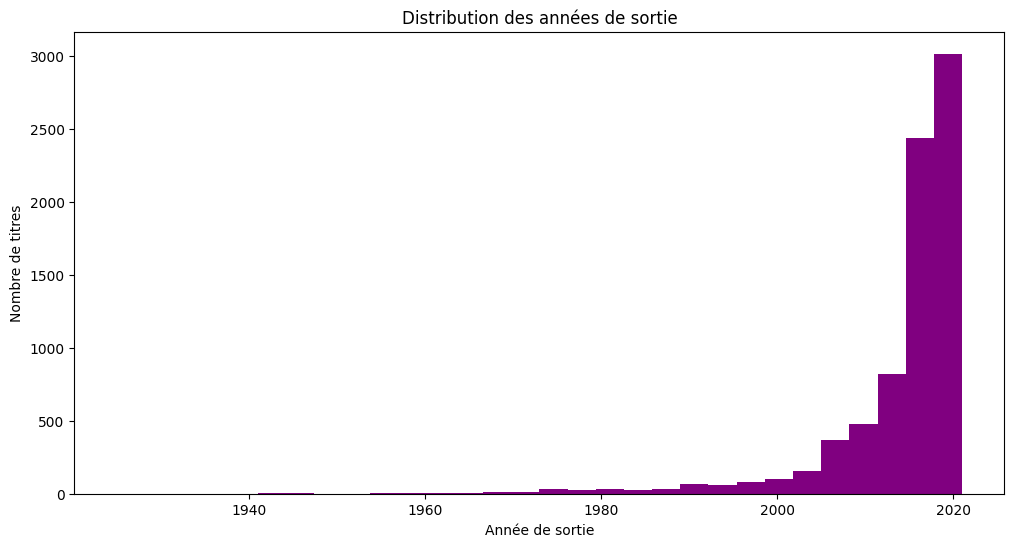

In [9]:
# Visualiser la distribution des années de sortie
plt.figure(figsize=(12, 6))
plt.hist(df['release_year'], bins=30, color='purple')
plt.title('Distribution des années de sortie')
plt.xlabel('Année de sortie')
plt.ylabel('Nombre de titres')
plt.show()

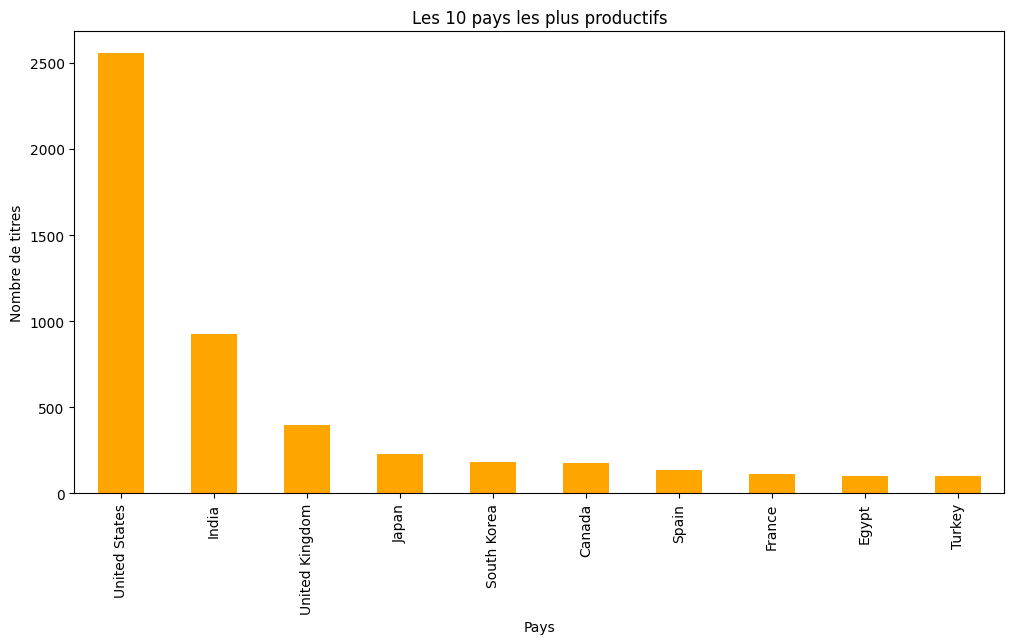

In [10]:
# Les 10 pays les plus productifs
top_countries = df['country'].value_counts().head(10)

# Visualisation
plt.figure(figsize=(12, 6))
top_countries.plot(kind='bar', color='orange')
plt.title('Les 10 pays les plus productifs')
plt.xlabel('Pays')
plt.ylabel('Nombre de titres')
plt.show()

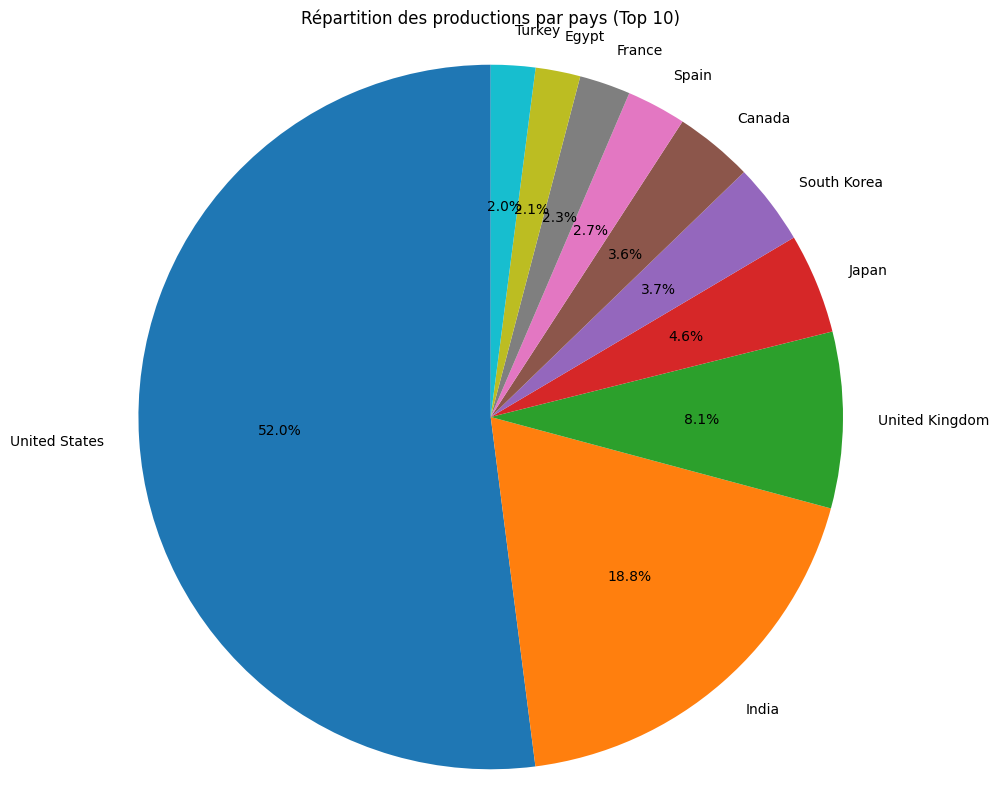

In [14]:
# Les 10 pays les plus productifs
top_countries_10 = df['country'].value_counts().head(10)

# Visualisation avec un graphique à secteurs
plt.figure(figsize=(10, 10))
plt.pie(top_countries_10, labels=top_countries_10.index, autopct='%1.1f%%', startangle=90)
plt.title('Répartition des productions par pays (Top 10)')
plt.axis('equal')  # Pour que le graphique soit un cercle parfait
plt.show()

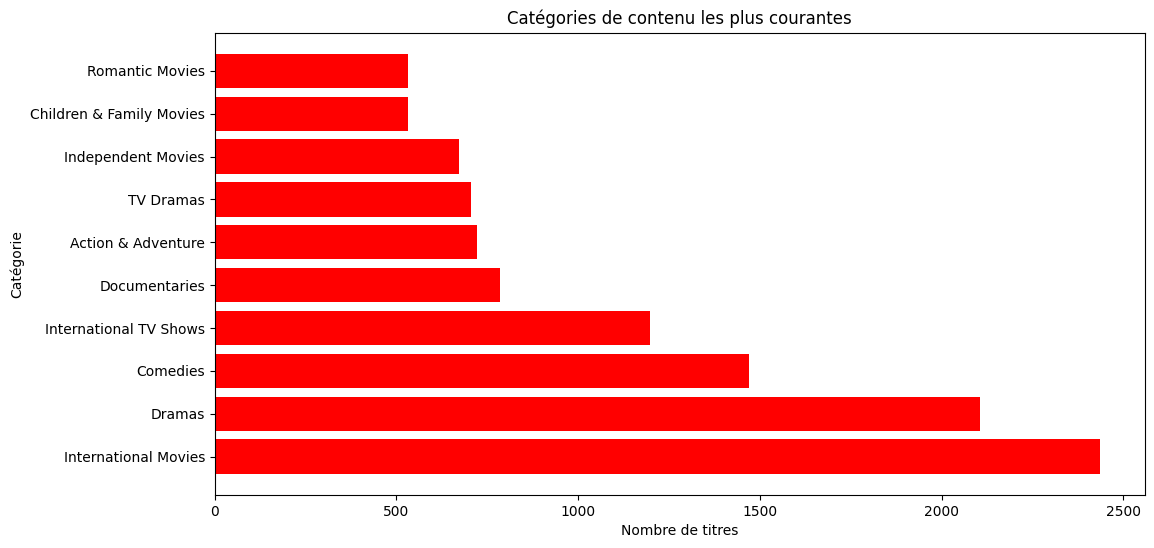

In [11]:
from collections import Counter
categories = df['listed_in'].str.split(', ').sum()
category_counts = Counter(categories)

# Convertir en DataFrame et trier
category_df = pd.DataFrame.from_dict(category_counts, orient='index', columns=['Count']).reset_index()
category_df = category_df.rename(columns={'index': 'Category'}).sort_values('Count', ascending=False).head(10)

# Visualisation
plt.figure(figsize=(12, 6))
plt.barh(category_df['Category'], category_df['Count'], color='red')
plt.title('Catégories de contenu les plus courantes')
plt.xlabel('Nombre de titres')
plt.ylabel('Catégorie')
plt.show()


In [13]:
# Système de recommandation simple basé sur les catégories
def recommend_by_category(category, top_n=5):
    # Filtrer les titres qui contiennent la catégorie spécifiée
    filtered_df = df[df['listed_in'].str.contains(category, case=False, na=False)]
    
    # Retourner les 'top_n' titres les plus récents dans cette catégorie
    recommendations = filtered_df.sort_values('release_year', ascending=False).head(top_n)[['title', 'release_year', 'description']]
    return recommendations

# Exemple de recommandation pour la catégorie 'Action'
recommend_by_category('Action')


,title,release_year,description
1440,Cobra Kai,2021,Decades after the tournament that changed thei...
1780,Disenchantment,2021,"Princess duties call, but she'd rather be drin..."
4710,Outside the Wire,2021,"In the near future, a drone pilot sent into a ..."
3822,Lupin,2021,"Inspired by the adventures of Arsène Lupin, ge..."
4987,Project Power,2020,"An ex-soldier, a teen and a cop collide in New..."


## Conclusion de l'Analyse des Titres Netflix

Dans cette analyse, nous avons exploré le dataset des titres disponibles sur Netflix. Nos principales découvertes sont :

### Points Clés

1. **Type de Titres**: Il y a plus de films que de séries TV sur Netflix.
2. **Années de Sortie**: La majorité des titres ont été publiés récemment, montrant un accent sur le contenu actuel.
3. **Pays Producteurs**: Les États-Unis sont le pays le plus productif, suivis par d'autres pays comme l'Inde et le Royaume-Uni.
4. **Catégories Populaires**: Les catégories comme les "Dramas", "Comedies" et "Documentaires" sont très populaires.
5. **Visualisation Géographique**: Nous avons visualisé la répartition géographique des productions de Netflix, montrant une concentration dans quelques pays clés.
6. **Recommandation de Contenu**: Un simple système de recommandation a été mis en place pour suggérer des titres basés sur les catégories.


